In [1]:
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import array_to_img
import warnings
warnings.filterwarnings("ignore")

In [2]:
calc_test = pd.read_csv("../data/calc_case_description_test_set.csv")
calc_train = pd.read_csv("../data/calc_case_description_train_set.csv")
mass_test = pd.read_csv("../data/mass_case_description_test_set.csv")
mass_train = pd.read_csv("../data/mass_case_description_train_set.csv")

### Check categorical values

In [ ]:
# Merge dataframes and one hot encoding categorical columns more than two classes
calc_test["calc type"].value_counts()

PLEOMORPHIC                          149
AMORPHOUS                             43
PUNCTATE                              26
FINE_LINEAR_BRANCHING                 25
LUCENT_CENTER                         17
ROUND_AND_REGULAR                     10
PUNCTATE-PLEOMORPHIC                   9
VASCULAR                               8
EGGSHELL                               6
AMORPHOUS-PLEOMORPHIC                  4
PUNCTATE-AMORPHOUS-PLEOMORPHIC         4
COARSE                                 4
COARSE-LUCENT_CENTER                   4
PLEOMORPHIC-FINE_LINEAR_BRANCHING      3
PUNCTATE-AMORPHOUS                     2
COARSE-ROUND_AND_REGULAR               2
COARSE-PLEOMORPHIC                     2
SKIN                                   2
ROUND_AND_REGULAR-PLEOMORPHIC          1
PLEOMORPHIC-AMORPHOUS                  1
Name: calc type, dtype: int64

- PLEOMORPHIC
- AMORPHOUS
- PUNCTATE                              
- FINE_LINEAR_BRANCHING
- LUCENT_CENTER
- ROUND_AND_REGULAR
- VASCULAR
- EGGSHELL
- COARSE
- SKIN

In [ ]:
calc_test['calc distribution'].value_counts()

CLUSTERED              195
SEGMENTAL               34
LINEAR                  22
CLUSTERED-LINEAR         4
DIFFUSELY_SCATTERED      3
REGIONAL                 3
LINEAR-SEGMENTAL         2
Name: calc distribution, dtype: int64

- CLUSTERED              
- SEGMENTAL
- LINEAR                              
- DIFFUSELY_SCATTERED
- REGIONAL

In [ ]:
mass_test["mass shape"].value_counts()

IRREGULAR                             113
OVAL                                   91
LOBULATED                              79
ROUND                                  41
ARCHITECTURAL_DISTORTION               23
LYMPH_NODE                              9
IRREGULAR-ARCHITECTURAL_DISTORTION      7
FOCAL_ASYMMETRIC_DENSITY                6
ASYMMETRIC_BREAST_TISSUE                5
OVAL-LOBULATED                          1
IRREGULAR-ASYMMETRIC_BREAST_TISSUE      1
LOBULATED-LYMPH_NODE                    1
LOBULATED-IRREGULAR                     1
Name: mass shape, dtype: int64

- IRREGULAR              
- OVAL                                   
- LOBULATED                                                            
- ROUND                                  
- ARCHITECTURAL_DISTORTION
- LYMPH_NODE                              
- FOCAL_ASYMMETRIC_DENSITY
- ASYMMETRIC_BREAST_TISSUE                

In [ ]:
mass_test["mass margins"].value_counts()

ILL_DEFINED                                 92
CIRCUMSCRIBED                               87
SPICULATED                                  82
OBSCURED                                    50
MICROLOBULATED                              21
ILL_DEFINED-SPICULATED                       5
OBSCURED-ILL_DEFINED                         5
CIRCUMSCRIBED-OBSCURED-ILL_DEFINED           4
CIRCUMSCRIBED-OBSCURED                       3
CIRCUMSCRIBED-MICROLOBULATED-ILL_DEFINED     3
OBSCURED-CIRCUMSCRIBED                       2
CIRCUMSCRIBED-ILL_DEFINED                    2
MICROLOBULATED-ILL_DEFINED                   2
CIRCUMSCRIBED-SPICULATED                     1
OBSCURED-ILL_DEFINED-SPICULATED              1
CIRCUMSCRIBED-MICROLOBULATED                 1
Name: mass margins, dtype: int64

- ILL_DEFINED                                 
- CIRCUMSCRIBED                               
- SPICULATED                                  
- OBSCURED                                    
- MICROLOBULATED

In [ ]:
calc_test

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,P_02464,2,RIGHT,MLO,1,calcification,FINE_LINEAR_BRANCHING,CLUSTERED,0,MALIGNANT,4,Calc-Test_P_02464_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02464_RIGHT_MLO_1/1.3.6.1.4.1.9590...
322,P_02498,4,RIGHT,CC,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02498_RIGHT_CC_1/1.3.6.1.4.1.9590....
323,P_02498,4,RIGHT,MLO,1,calcification,PUNCTATE,CLUSTERED,0,BENIGN,3,Calc-Test_P_02498_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_02498_RIGHT_MLO_1/1.3.6.1.4.1.9590...
324,P_02501,3,RIGHT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,0,MALIGNANT,3,Calc-Test_P_02501_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_02501_RIGHT_CC_1/1.3.6.1.4.1.9590....


### Downsampling

In [3]:
# drop mass records without a mass shape or mass margins, and calc records withouts calc type and calc distribution before sampling
calc_test_mask = (calc_test['calc type'].isna()) | (calc_test['calc distribution'].isna())
calc_train_mask = (calc_train['calc type'].isna()) | (calc_train['calc distribution'].isna())
mass_test_mask = (mass_test['mass shape'].isna()) | (mass_test['mass margins'].isna())
mass_train_mask = (mass_train['mass shape'].isna()) | (mass_train['mass margins'].isna())

calc_test = calc_test[~calc_test_mask].reset_index(drop=True)
calc_train = calc_train[~calc_train_mask].reset_index(drop=True)
mass_test = mass_test[~mass_test_mask].reset_index(drop=True)
mass_train = mass_train[~mass_train_mask].reset_index(drop=True)

In [4]:
# stratified sampling on each subset (50% of the dataset size) based on pathdology type 
rs = 42

def downsample_subset(df):
    n_sample = int(len(df[df.pathology == 'MALIGNANT'])/2)
    malignant_samples = df[df.pathology == 'MALIGNANT'].sample(n=n_sample, random_state=rs)
    benign_samples = df[df.pathology != 'MALIGNANT'].sample(n=n_sample, random_state=rs)
    df = pd.concat([malignant_samples, benign_samples], ignore_index=True).reset_index(drop=True)
    return df

calc_test_sampled = downsample_subset(calc_test)
calc_train_sampled = downsample_subset(calc_train)
mass_test_sampled = downsample_subset(mass_test)
mass_train_sampled = downsample_subset(mass_train)

In [5]:
print("calc_test")
print("Before Sampling: \n============================")
print(calc_test.pathology.value_counts())
print("\nAfter Sampling: \n============================")
print(calc_test_sampled.pathology.value_counts())

print("\nmass_test")
print("Before Sampling: \n============================")
print(mass_test.pathology.value_counts())
print("\nAfter Sampling: \n============================")
print(mass_test_sampled.pathology.value_counts())

print("\ncalc_train")
print("Before Sampling: \n============================")
print(calc_train.pathology.value_counts())
print("\nAfter Sampling: \n============================")
print(calc_train_sampled.pathology.value_counts())

print("\nmass_train")
print("Before Sampling: \n============================")
print(mass_train.pathology.value_counts())
print("\nAfter Sampling: \n============================")
print(mass_train_sampled.pathology.value_counts())

calc_test
Before Sampling: 
pathology
BENIGN                     130
MALIGNANT                  127
BENIGN_WITHOUT_CALLBACK      2
Name: count, dtype: int64

After Sampling: 
pathology
MALIGNANT                  63
BENIGN                     62
BENIGN_WITHOUT_CALLBACK     1
Name: count, dtype: int64

mass_test
Before Sampling: 
pathology
BENIGN                     193
MALIGNANT                  145
BENIGN_WITHOUT_CALLBACK     23
Name: count, dtype: int64

After Sampling: 
pathology
MALIGNANT                  72
BENIGN                     66
BENIGN_WITHOUT_CALLBACK     6
Name: count, dtype: int64

calc_train
Before Sampling: 
pathology
MALIGNANT                  543
BENIGN                     522
BENIGN_WITHOUT_CALLBACK     85
Name: count, dtype: int64

After Sampling: 
pathology
MALIGNANT                  271
BENIGN                     233
BENIGN_WITHOUT_CALLBACK     38
Name: count, dtype: int64

mass_train
Before Sampling: 
pathology
MALIGNANT                  626
BENIGN              

### Preprocess and Categorical One-Hot Encoding

In [6]:
# concatenate all the datasets
calc = pd.concat([calc_test_sampled, calc_train_sampled], ignore_index=True)
mass = pd.concat([mass_test_sampled, mass_train_sampled], ignore_index=True).rename(columns={'breast_density':'breast density'})
all_df = pd.concat([mass, calc], ignore_index=True)

In [7]:
# create meta feature subset
# mass_meta_feats = ['breast density', 'left or right breast', 'image view', 'abnormality type', 'mass shape', 'mass margins', 'assessment', 'pathology', 'subtlety']
# mass_meta = mass[mass_meta_feats]

# create unique id 
all_df['id'] = all_df['patient_id'] + '_' + all_df['left or right breast'] + '_' + all_df['image view'] + '_' + (all_df['abnormality id'].astype(str))

# encode binary columns 
all_df['is_left_breast'] = all_df['left or right breast'].map({'LEFT':1, 'RIGHT':0})
all_df['is_CC_view'] = all_df['image view'].map({'CC':1, 'MLO':0})
all_df['is_mass'] = all_df['abnormality type'].map({'mass':1, 'calcification':0})
all_df['is_malignant'] = all_df['pathology'].map({'MALIGNANT':1, 'BENIGN':0, 'BENIGN_WITHOUT_CALLBACK':0}) # treat 'BENIGN_WITHOUT_CALLBACK' as 'BENIGN

In [8]:
# one hot encode mass margins and mass shape
# note that some samples could contain composite values of two class values (e.g. PUNCTATE-PLEOMORPHIC)
# instead of treating the entire compositie category as a single category, we one-hot encode each individual category separately.

# turn the class values into a list of values
all_df['mass margins'] = all_df['mass margins'].apply(lambda x: [] if pd.isna(x) else str(x).split('-'))
all_df['mass shape'] = all_df['mass shape'].apply(lambda x: [] if pd.isna(x) else str(x).split('-'))
all_df['calc type'] = all_df['calc type'].apply(lambda x: [] if pd.isna(x) else str(x).split('-'))
all_df['calc distribution'] = all_df['calc distribution'].apply(lambda x: [] if pd.isna(x) else str(x).split('-'))

# perform one-hot encoding
mass_shape_ohe = all_df['mass shape'].apply(lambda x: pd.Series({} if len(x) == 0 else {cat: 1 for cat in x})).fillna(0).add_prefix('mass_shape_').astype('int')
mass_margin_ohe = all_df['mass margins'].apply(lambda x: pd.Series({} if len(x) == 0 else {cat: 1 for cat in x})).fillna(0).add_prefix('mass_margins_').astype('int')
calc_type_ohe = all_df['calc type'].apply(lambda x: pd.Series({} if len(x) == 0 else {cat: 1 for cat in x})).fillna(0).add_prefix('calc_type_').astype('int')
calc_dist_ohe = all_df['calc distribution'].apply(lambda x: pd.Series({} if len(x) == 0 else {cat: 1 for cat in x})).fillna(0).add_prefix('calc_dist_').astype('int')

# reformat column names to all lower case
mass_shape_ohe.columns = mass_shape_ohe.columns.str.lower() 
mass_margin_ohe.columns = mass_margin_ohe.columns.str.lower()
calc_type_ohe.columns = calc_type_ohe.columns.str.lower()
calc_dist_ohe.columns = calc_dist_ohe.columns.str.lower()

# join the one-hot encoded dataframes back to the original df
all_df = pd.concat([all_df, mass_shape_ohe, mass_margin_ohe, calc_type_ohe, calc_dist_ohe], axis=1)

# replace any breast density of value 0 with 1
all_df['breast density'] = all_df['breast density'].replace({0: 1})

# combine calc_type_lucent_center and calc_type_lucent_centered
all_df['calc_type_lucent_center'] = (all_df['calc_type_lucent_center'] + all_df['calc_type_lucent_centered']).astype(int)
all_df.drop(columns=['calc_type_lucent_centered'], inplace=True)

In [9]:
# drop unnecessary columns
all_df.drop(columns=['patient_id', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'mass shape', 'mass margins', 'pathology', 'calc type', 'calc distribution'], inplace=True)

In [10]:
all_df.head(3).T

,0,1,2
breast density,2,3,3
assessment,5,4,3
subtlety,5,2,2
image file path,Mass-Test_P_00942_LEFT_CC/1.3.6.1.4.1.9590.100...,Mass-Test_P_01815_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Mass-Test_P_00324_RIGHT_CC/1.3.6.1.4.1.9590.10...
cropped image file path,Mass-Test_P_00942_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_01815_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_00324_RIGHT_CC_1/1.3.6.1.4.1.9590....
ROI mask file path,Mass-Test_P_00942_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Mass-Test_P_01815_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Mass-Test_P_00324_RIGHT_CC_1/1.3.6.1.4.1.9590....
id,P_00942_LEFT_CC_1,P_01815_RIGHT_MLO_1,P_00324_RIGHT_CC_1
is_left_breast,1,0,0
is_CC_view,1,0,1
is_mass,1,1,1


### Train, Test, Validation Split
- perform train, test, validation on the ratio of `6:2:2` (80% for training, 20% for testing) using `sklearn`'s `train_test_split` function
- stratify based on the target & abnormality type column: try to main balanced 25% split `calc belign`, `calc maglinant`, `mass belign`, `mass maglinant` across all three splits

In [11]:
# look at the current target distribution
all_df[['is_mass', 'is_malignant']].value_counts()

is_mass  is_malignant
1        0               385
         1               385
0        0               334
         1               334
Name: count, dtype: int64

In [12]:
# Perform train-validation-test split with stratification on the 'combined' and 'target' columns
train_val, test_df = train_test_split(all_df, test_size=0.2, stratify=all_df[['is_mass', 'is_malignant']], random_state=42)
train_df, val_df = train_test_split(train_val, test_size=0.25, stratify=train_val[['is_mass', 'is_malignant']], random_state=42)

In [13]:
test_df[['is_mass', 'is_malignant']].value_counts()

is_mass  is_malignant
1        0               77
         1               77
0        0               67
         1               67
Name: count, dtype: int64

In [14]:
train_df[['is_mass', 'is_malignant']].value_counts()

is_mass  is_malignant
1        0               231
         1               231
0        0               200
         1               200
Name: count, dtype: int64

In [15]:
val_df[['is_mass', 'is_malignant']].value_counts()

is_mass  is_malignant
1        0               77
         1               77
0        0               67
         1               67
Name: count, dtype: int64

In [16]:
test_df = test_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

### Map Images to CSV files

In [49]:
# del test_df 
# del val_df
# del train_df_1
# del train_df_2
# train_df_1 = train_df.iloc[:300]
# train_df_2 = train_df.iloc[300:600]
# train_df_3 = train_df.iloc[600:]

In [20]:
root_dir = 'data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM'

for df in [val_df, train_df, test_df]:

    full_image_dict = {} # only store unique folder
    cropped_image_list = []
    roi_image_list = []

    df['full_image_folder_name'] = df['image file path'].apply(lambda x: x.split('/')[0])
    df['cropped_image_folder_name'] = df['cropped image file path'].apply(lambda x: x.split('/')[0])

    present_files = []
    for _, data in df.iterrows():
        for i, folder_name in enumerate([data.full_image_folder_name, data.cropped_image_folder_name]):
            # print(f"Processing folder: {folder_name}")
            if (i == 0) & (folder_name in full_image_dict): # if full image already stored in full_image_dict
                continue
            # folder_name = data.full_image_folder_name
            # path = os.path.join(root_dir, folder_name)
            # if os.path.exists(path):
            #     count += 1
            for root, _, files in os.walk(os.path.join(root_dir, folder_name)):
            #     count += 1
                for file in files:
                    if file.endswith('.dcm'):
                        present_files.append(folder_name)
                        dicom_file_path = os.path.join(root, file) 
                        # Read the DICOM image
                        dcm = pydicom.dcmread(dicom_file_path)
                        # Extract the pixel data from the DICOM image to create image object
                        image_data = dcm.pixel_array
                        if i == 0:
                            # it is a full image path
                            # store image object into dictionary
                            full_image_dict[folder_name] = image_data
                        else:
                            # it is either roi or cropped image
                            try:
                                if dcm.SeriesDescription == 'cropped images':
                                    cropped_image_list.append(image_data)
                                # elif dcm.SeriesDescription == 'ROI mask images':
                                else:
                                    roi_image_list.append(image_data)
                            except Exception as e:
                                roi_image_list.append(image_data)
        
    df['full_image_pixel_array'] = df['full_image_folder_name'].map(full_image_dict)
    df['cropped_image_pixel_array'] = cropped_image_list
    df['roi_image_pixel_array'] = roi_image_list

In [21]:
# create dirs for saving data 
test_dir = 'dataset/test'
train_dir = 'dataset/train'
val_dir = 'dataset/val'
os.makedirs(test_dir)
os.makedirs(train_dir)
os.makedirs(val_dir)

# data header names
columns = train_df.columns.to_list()
meta_header = columns[:3] + columns[7:10] + columns[11:-5]
target_header = 'is_malignant'
full_image_header = 'full_image_pixel_array'
cropped_image_header = 'cropped_image_pixel_array'
roi_image_header = 'roi_image_pixel_array'

# write the meta feature names into a txt file
with open('dataset/meta_header.txt', 'w') as file:
    for feat_name in meta_header:
        file.write(feat_name + "\n")

# write id references into txt files
with open('dataset/id_reference_test.txt', 'w') as file:
    for id_ in test_df['id']:
        file.write(id_ + "\n")

with open('dataset/id_reference_train.txt', 'w') as file:
    for id_ in train_df['id']:
        file.write(id_ + "\n")

with open('dataset/id_reference_val.txt', 'w') as file:
    for id_ in val_df['id']:
        file.write(id_ + "\n")

In [626]:
for _, (df, dir_) in enumerate(zip([test_df, val_df, train_df], [test_dir, val_dir, train_dir])):
    for i, (x_full, x_cropped, x_roi, meta, y) in (enumerate(zip(df[full_image_header], df[cropped_image_header], df[roi_image_header], df[meta_header].values, np.array(df[target_header]).reshape(-1,1)))):
        np.save(os.path.join(dir_, str(i + 1) + "_x_full.npy"), x_full)
        np.save(os.path.join(dir_, str(i + 1) + "_x_cropped.npy"), x_cropped)
        np.save(os.path.join(dir_, str(i + 1) + "_x_roi.npy"), x_roi)
        np.save(os.path.join(dir_, str(i + 1) + "_meta.npy"), meta)
        np.save(os.path.join(dir_, str(i + 1) + "_y.npy"), y)

In [22]:
# # for i, (x_full, x_cropped, x_roi, meta, y) in (enumerate(zip(train_df_2[full_image_header], train_df_2[cropped_image_header], train_df_2[roi_image_header], train_df_2[meta_header].values, np.array(train_df_2[target_header]).reshape(-1,1)))):
# #         np.save(os.path.join(train_dir, str(i + 300 + 1) + "_x_full.npy"), x_full)
# #         np.save(os.path.join(train_dir, str(i + 300 + 1) + "_x_cropped.npy"), x_cropped)
# #         np.save(os.path.join(train_dir, str(i + 300 + 1) + "_x_roi.npy"), x_roi)
# #         np.save(os.path.join(train_dir, str(i + 300 + 1) + "_meta.npy"), meta)
# #         np.save(os.path.join(train_dir, str(i + 300 + 1) + "_y.npy"), y)

# for i, (x_full, x_cropped, x_roi, meta, y) in (enumerate(zip(train_df_3[full_image_header], train_df_3[cropped_image_header], train_df_3[roi_image_header], train_df_3[meta_header].values, np.array(train_df_3[target_header]).reshape(-1,1)))):
#         np.save(os.path.join(train_dir, str(i + 845 + 1) + "_x_full.npy"), x_full)
#         np.save(os.path.join(train_dir, str(i + 845 + 1) + "_x_cropped.npy"), x_cropped)
#         np.save(os.path.join(train_dir, str(i + 845 + 1) + "_x_roi.npy"), x_roi)
#         np.save(os.path.join(train_dir, str(i + 845 + 1) + "_meta.npy"), meta)
#         np.save(os.path.join(train_dir, str(i + 845 + 1) + "_y.npy"), y)

### Explore Unique Values

In [22]:
nunique_pathology_df = mass_test.groupby(['patient_id', 'left or right breast'])['pathology'].nunique().reset_index()
nunique_pathology_df[nunique_pathology_df.pathology > 1]

,patient_id,pathology
93,P_00820,2
104,P_00951,2
107,P_00969,2
173,P_01623,2
194,P_01800,2


### load saved image array in .npy file

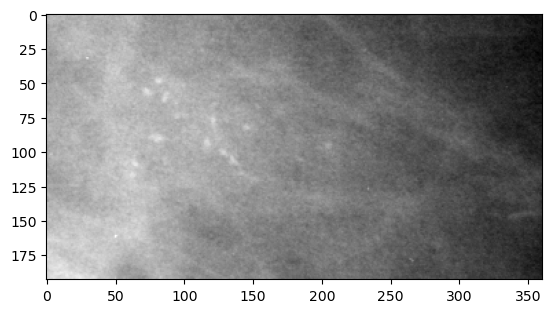

In [32]:
X = np.load('dataset/test/100_x_cropped.npy')
X = X.reshape(X.shape[0], X.shape[1], 1) # 2d to 3d (colour channel = 1)
img_x = array_to_img(X)
plt.imshow(img_x, cmap='gray')

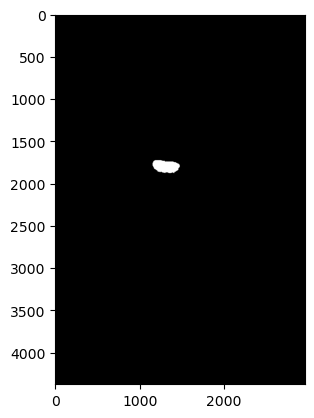

In [33]:
X = np.load('dataset/test/100_x_roi.npy')
X = X.reshape(X.shape[0], X.shape[1], 1) # 2d to 3d (colour channel = 1)
img_x = array_to_img(X)
plt.imshow(img_x, cmap='gray')

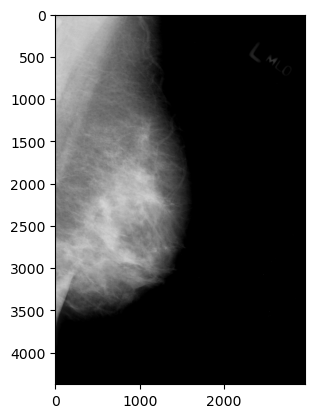

In [34]:
X = np.load('dataset/test/100_x_full.npy')
X = X.reshape(X.shape[0], X.shape[1], 1) # 2d to 3d (colour channel = 1)
img_x = array_to_img(X)
plt.imshow(img_x, cmap='gray')